# Mod2 Project - Linear Regression Model

Third Notebook

## Now we move on to Modeling

With the hypothesis tests done, we move on to the model itself. Our goal is to make an accurate prediction based on the data collected and the features engineered.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.dummy import DummyRegressor
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sys
from sklearn.linear_model import LassoCV
sys.path.append('../')
import helper as helper
sns.set(style="whitegrid")

plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 80)

%matplotlib inline

In [2]:
df = pd.read_csv('rookie.csv')

## First we get a list of features

Using the columns in our data, we remove anything that has to do with salary

In [4]:
features = ['award_winner', 'G',
       'AB', 'R', 'H', 'DBL', 'TPL', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO',
       'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'OBP', 'BA', 'TB', 'SLG', 'OPS',
        'seasons', 'G_p', 'W_p', 'L_p', 'GS_p', 'CG', 'SHO_p',
       'SV_p', 'IPouts', 'ER_p', 'HR_p', 'SO_p', 'IBB_p', 'BAOpp', 'ERA',
       'WP', 'HBP_p', 'BK', 'BFP', 'GF', 'R_p', 'SH_p', 'SF_p', 'GIDP_p',
       'WHIP', 'IP', 'BB_p', 'throws_R', 'bats_L', 'bats_R',
       'prim_pos_2B', 'prim_pos_3B', 'prim_pos_C', 'prim_pos_OF',
       'prim_pos_P', 'prim_pos_SS']

con_col = ['AB', 'R', 'H', 'DBL', 'TPL', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO',
       'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'OBP', 'BA', 'TB', 'SLG', 'OPS',
        'seasons', 'G_p', 'W_p', 'L_p', 'GS_p', 'CG', 'SHO_p',
       'SV_p', 'IPouts', 'ER_p', 'HR_p', 'SO_p', 'IBB_p', 'BAOpp', 'ERA',
       'WP', 'HBP_p', 'BK', 'BFP', 'GF', 'R_p', 'SH_p', 'SF_p', 'GIDP_p',
       'WHIP', 'IP', 'BB_p']
cat_col = ['throws_R', 'bats_L', 'bats_R',
       'prim_pos_2B', 'prim_pos_3B', 'prim_pos_C', 'prim_pos_OF',
       'prim_pos_P', 'prim_pos_SS']

## Dummy Regression Model

Run a baseline model to see what can be done with just the mean

In [5]:
y = df['salary']
X = df[features]

df_features = df[features]

dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X, y)
kelevin = dummy_regr.predict(X)
r2_score(y, kelevin)

0.0

#### The R2 score for the baseline model is 0.

## Model Running Time

In [6]:
target = df.salary

X_train, X_test, y_train, y_test = train_test_split(df[features], target,
                                                    random_state = 115, test_size = 0.2)

X_train = helper.df_scaler(X_train,con_col)
X_test = helper.df_scaler(X_test,con_col)
y_train = helper.scaler(y_train)
y_test = helper.scaler(y_test)

X_train= X_train.replace(np.nan,0)
X_test= X_test.replace(np.nan,0)
y_train= y_train.replace(np.nan,0)
y_test= y_test.replace(np.nan,0)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape) 
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)    

Training set - Features:  (795, 59) Target:  (795,)
Training set - Features:  (199, 59) Target:  (199,)


In [7]:

lm = LinearRegression()
lm = lm.fit(X_train, y_train)
        
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

coef_df = pd.DataFrame()
coef_df['Features'] = X_train.columns
coef_df['Values'] = lm.coef_
model_coef = coef_df.sort_values(by='Values', ascending = False)

    
train_R2 = r2_score(y_train, y_pred_train)
test_R2 = r2_score(y_test, y_pred_test)


print('Train R2:', train_R2)
print(' Test R2:', test_R2)
print(model_coef)

Train R2: 0.46066799937069114
 Test R2: 0.38265523763145837
        Features        Values
50        BFP_sc  2.060796e+00
43       SO_p_sc  6.579016e-01
36       GS_p_sc  5.592571e-01
0   award_winner  4.408308e-01
41       ER_p_sc  3.588220e-01
8    prim_pos_OF  3.166703e-01
11         AB_sc  3.147466e-01
9     prim_pos_P  2.558375e-01
55     GIDP_p_sc  2.547015e-01
16         HR_sc  2.535182e-01
20         BB_sc  2.495532e-01
39       SV_p_sc  2.492064e-01
33        G_p_sc  2.115780e-01
2       throws_R  2.078616e-01
7     prim_pos_C  1.877811e-01
17        RBI_sc  1.780457e-01
13          H_sc  1.624892e-01
15        TPL_sc  1.411057e-01
29         TB_sc  1.356211e-01
19         CS_sc  1.099978e-01
5    prim_pos_2B  7.621194e-02
31        OPS_sc  6.339948e-02
10   prim_pos_SS  5.740757e-02
37         CG_sc  4.766770e-02
22        IBB_sc  4.351089e-02
34        W_p_sc  3.746380e-02
49         BK_sc  2.388222e-02
6    prim_pos_3B  2.299227e-02
30        SLG_sc  8.322602e-03
46        

### The training R2 score was about 46%.
### The test R2 score was about 38%

In [8]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01, normalize=True)
lasso.fit(X_train, y_train)

y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)


trainr2 = r2_score(y_train, y_train_pred_lasso)
testr2 = r2_score(y_test, y_test_pred_lasso)
print('Training R2: '+ str(trainr2) )
print(' Testing R2: '+ str(testr2) )



Training R2: 0.070217057038238
 Testing R2: 0.08121847516094405


Text(0, 0.5, 'Predictions')

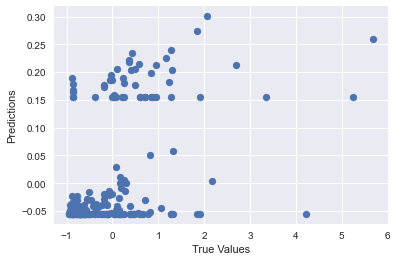

In [9]:
## The line / model
plt.scatter(y_test, y_test_pred_lasso)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [10]:
from sklearn.linear_model import Lasso

lasso1 = Lasso(alpha=.1, normalize=False)

lasso1.fit(X_train,y_train)

y_train_lasso1 = lasso1.predict(X_train)
y_pred_lasso1 = lasso1.predict(X_test)

trainr2 = r2_score(y_train, y_train_lasso1)
testr2 = r2_score(y_test, y_pred_lasso1)
print('Training R2: '+ str(trainr2) )
print(' Testing R2: '+ str(testr2) )

Training R2: 0.2548974931917828
 Testing R2: 0.2834934950695127


### Using Lasso, my test model had a R2 of 28%

## Generate Polynomial and Interaction features

poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(df_features)
poly2_columns = poly_2.get_feature_names(df_features.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
#df_poly2.head()
df_poly2.shape

X_train, X_test, y_train, y_test = train_test_split(df_poly2, target, random_state=105,test_size=0.2)

scaler2 = StandardScaler()
# fit the scaler to the training data
scaler2.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler2.transform(X_train), columns=df_poly2[con_col])

#transform the testing dat
X_test = pd.DataFrame(data=scaler2.transform(X_test), columns=df_poly2[con_col])

# instantiate a linear regression object
lm_2 = LinearRegression()

#fit the linear regression to the data
lm_2 = lm_2.fit(X_train, y_train)

y_train_pred = lm_2.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error((y_train), (y_train_pred)))


print('Training Root Mean Squared Error:' , train_rmse)

# use fitted model to predict on test data
y_pred = lm_2.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error((y_test), (y_pred)))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

np.exp(y_test)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_features.values, i) for i in range(df_features.shape[1])]
vif["features"] = df_features.columns
vif.round(1)

from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=20)

selector.fit(X_train, y_train)

selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
X_train = X_train[selected_columns]
X_test = X_test[selected_columns]

#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)


print('Original: ', test_rmse, "vs. KBest: ", testK_rmse)

## The line / model
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

sns.residplot(y_pred, y_test, lowess=True, color="g")

# There is a problem happening and it seems that it happens due to the mixture of pitchers and batters

In [11]:
pitch = df[df['prim_pos'].eq('P')]
bat = df[df['prim_pos'].ne('P')]

In [12]:
bat.head()

,Unnamed: 0,playerID,birthYear,nameFirst,nameLast,weight,height,debut,finalGame,award_winner,G,AB,R,H,DBL,TPL,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,BA,TB,SLG,OPS,salary,seasons,G_p,W_p,L_p,GS_p,CG,SHO_p,SV_p,IPouts,ER_p,HR_p,SO_p,IBB_p,BAOpp,ERA,WP,HBP_p,BK,BFP,GF,R_p,SH_p,SF_p,GIDP_p,WHIP,IP,BB_p,throws_R,bats_L,bats_R,prim_pos_2B,prim_pos_3B,prim_pos_C,prim_pos_OF,prim_pos_P,prim_pos_SS,throws,prim_pos
2,2,abreuto01,1984.0,Tony,Abreu,200.0,70.0,2007-05-22,2014-07-28,0,48.666667,122.333333,11.666667,30.666667,8.333333,0.666667,1.000000,10.333333,0.666667,0.666667,4.666667,23.333333,0.333333,1.000000,0.000000,2.000000,4.333333,0.335772,0.251415,53.333333,0.379815,0.715586,745000.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,R,2B
4,4,ackledu01,1988.0,Dustin,Ackley,205.0,73.0,2011-06-17,2016-05-29,0,118.666667,441.333333,54.333333,108.333333,18.666667,3.666667,7.333333,39.000000,7.000000,2.000000,45.333333,91.666667,3.000000,0.333333,1.666667,1.666667,4.000000,0.320469,0.250526,186.000000,0.431767,0.752236,2600000.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,R,1B
5,5,adamsma01,1988.0,Matt,Adams,245.0,75.0,2012-05-20,2020-07-29,0,92.333333,303.000000,36.333333,85.666667,18.000000,1.666667,11.333333,44.000000,1.000000,1.000000,18.000000,72.666667,1.666667,1.000000,0.000000,2.333333,7.000000,0.314210,0.272132,172.000000,0.548208,0.862418,1650000.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,R,1B
12,12,alonsyo01,1987.0,Yonder,Alonso,230.0,73.0,2010-09-01,2019-09-29,0,74.666667,222.000000,19.333333,61.666667,15.000000,0.000000,4.666667,26.666667,1.000000,0.000000,24.000000,44.000000,3.000000,1.000000,0.333333,1.333333,5.666667,0.317584,0.269889,110.333333,0.491143,0.808727,1650000.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,R,1B
13,13,altuvjo01,1990.0,Jose,Altuve,166.0,66.0,2011-07-20,2020-07-29,1,118.666667,474.333333,56.666667,135.000000,25.000000,2.333333,4.666667,33.666667,25.000000,9.000000,25.666667,62.666667,1.666667,3.333333,4.333333,4.333333,12.333333,0.317689,0.282899,210.666667,0.439014,0.756703,2500000.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,1,0,0,0,0,0,R,2B


In [13]:
pitch = pitch[['playerID','award_winner','salary','seasons','G_p','W_p','L_p','GS_p','CG','SHO_p','SV_p','IPouts',
               'ER_p','HR_p','SO_p','IBB_p','BAOpp','ERA','WP','HBP_p','BK','BFP','GF','R_p','SH_p','SF_p','GIDP_p',
               'WHIP','IP','BB_p','throws_R']]
bat = bat[['playerID','award_winner','salary','seasons','G','AB','R','H','DBL','TPL','HR','RBI','SB','CS','BB','SO',
           'IBB','HBP','SH','SF','GIDP','OBP','BA','TB','SLG','OPS','throws_R','bats_L','bats_R','prim_pos_2B',
           'prim_pos_3B','prim_pos_C','prim_pos_OF','prim_pos_P','prim_pos_SS']]

In [14]:
print(pitch.shape)
print(bat.shape)


(495, 31)
(499, 35)


## First we look at batters

In [15]:
bat.columns.values

array(['playerID', 'award_winner', 'salary', 'seasons', 'G', 'AB', 'R',
       'H', 'DBL', 'TPL', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB',
       'HBP', 'SH', 'SF', 'GIDP', 'OBP', 'BA', 'TB', 'SLG', 'OPS',
       'throws_R', 'bats_L', 'bats_R', 'prim_pos_2B', 'prim_pos_3B',
       'prim_pos_C', 'prim_pos_OF', 'prim_pos_P', 'prim_pos_SS'],
      dtype=object)

In [16]:
features = ['award_winner', 'seasons', 'G', 'AB', 'R',
       'H', 'DBL', 'TPL', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB',
       'HBP', 'SH', 'SF', 'GIDP', 'OBP', 'BA', 'TB', 'SLG', 'OPS',
       'throws_R', 'bats_L', 'bats_R', 'prim_pos_2B', 'prim_pos_3B',
       'prim_pos_C', 'prim_pos_OF', 'prim_pos_P', 'prim_pos_SS']

bat_con_cols = ['AB', 'R',
       'H', 'DBL', 'TPL', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB',
       'HBP', 'SH', 'SF', 'GIDP', 'OBP', 'BA', 'TB', 'SLG', 'OPS']
bat_cat_cols = ['seasons', 'G','throws_R', 'bats_L', 'bats_R', 'prim_pos_2B', 'prim_pos_3B',
       'prim_pos_C', 'prim_pos_OF', 'prim_pos_P', 'prim_pos_SS']

In [17]:
y = bat['salary']
X = bat[features]

bat_features = bat[features]

dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X, y)
kelevin = dummy_regr.predict(X)
r2_score(y, kelevin)

0.0

In [18]:
target = bat.salary

X_train, X_test, y_train, y_test = train_test_split(bat[features], target,
                                                    random_state = 115, test_size = 0.2)

X_train_bat = helper.df_scaler(X_train,bat_con_cols)
X_test_bat = helper.df_scaler(X_test,bat_con_cols)
y_train_bat = helper.scaler(y_train)
y_test_bat = helper.scaler(y_test)

X_train_bat = X_train_bat.replace(np.nan,0)
X_test_bat = X_test_bat.replace(np.nan,0)
y_train_bat = y_train_bat.replace(np.nan,0)
y_test_bat = y_test_bat.replace(np.nan,0)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape) 
print("Testing set - Features: ", X_test.shape, "Target: ",y_test.shape)    

Training set - Features:  (399, 33) Target:  (399,)
Testing set - Features:  (100, 33) Target:  (100,)


In [19]:
lm = LinearRegression()
lm = lm.fit(X_train, y_train)
        
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

#print('The intercept is ' + str(lm.intercept_))
print('\n')
#print('The coefficients are ' + str(lm.coef_))
coef_df = pd.DataFrame()
coef_df['Features'] = X_train.columns
coef_df['Values'] = lm.coef_
model_coef = coef_df.sort_values(by='Values', ascending = False)

    
train_R2 = r2_score(y_train, y_pred_train)
test_R2 = r2_score(y_test, y_pred_test)


print('Train R2:', train_R2)
print(' Test R2:', test_R2)
print('\n')
print(model_coef)



Train R2: 0.4881541693770626
 Test R2: 0.25380045577228794


        Features        Values
20            BA  3.695882e+06
0   award_winner  9.268839e+05
24      throws_R  3.209316e+05
30   prim_pos_OF  2.067154e+05
26        bats_R  1.965653e+05
14           IBB  1.622202e+05
11            CS  1.280618e+05
7            TPL  9.923410e+04
12            BB  4.083897e+04
21            TB  3.740435e+04
17            SF  2.659457e+04
22           SLG  1.757141e+04
9            RBI  1.204624e+04
3             AB  2.732627e+02
31    prim_pos_P  0.000000e+00
5              H -2.102222e+03
8             HR -4.582319e+03
10            SB -5.730693e+03
15           HBP -5.907641e+03
13            SO -1.585202e+04
2              G -1.819363e+04
4              R -3.594988e+04
1        seasons -7.378991e+04
18          GIDP -8.295553e+04
16            SH -9.708796e+04
29    prim_pos_C -9.945272e+04
6            DBL -1.199332e+05
25        bats_L -1.462969e+05
27   prim_pos_2B -2.855133e+05
28   pr

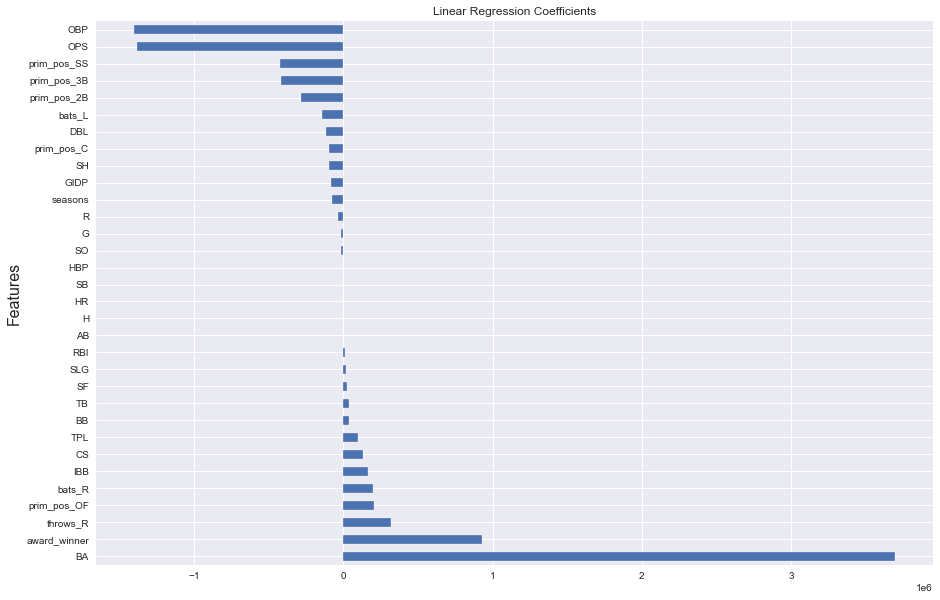

In [20]:
fig, ax = plt.subplots(figsize=(15,10))
model_coef.loc[model_coef['Values'] !=0].plot.barh(x='Features', y= 'Values', ax= ax, legend=False)
ax.set_ylabel('Features', fontsize=16)
ax.set_title('Linear Regression Coefficients')

plt.savefig('PNG/linreg_coef.png', dpi=300, 
            bbox_inches= 'tight', padding_inches = 4, transparent = True )

In [21]:

lasso = Lasso(alpha=.01, normalize=True)
lasso.fit(X_train_bat, y_train_bat)

y_train_pred_lasso = lasso.predict(X_train_bat)
y_test_pred_lasso = lasso.predict(X_test_bat)

coef_df = pd.DataFrame()
coef_df['Features'] = X_train_bat.columns
coef_df['Values'] = lm.coef_
model_coef = coef_df.sort_values(by='Values', ascending = False)

trainr2 = r2_score(y_train_bat, y_train_pred_lasso)
testr2 = r2_score(y_test_bat, y_test_pred_lasso)
print('Training R2: '+ str(trainr2) )
print(' Testing R2: '+ str(testr2) )

print(model_coef)



Training R2: 0.3354388736809011
 Testing R2: 0.3394311040225355
        Features        Values
20         CS_sc  3.695882e+06
0   award_winner  9.268839e+05
24        HBP_sc  3.209316e+05
30         TB_sc  2.067154e+05
26         SF_sc  1.965653e+05
14          H_sc  1.622202e+05
11   prim_pos_SS  1.280618e+05
7    prim_pos_3B  9.923410e+04
12         AB_sc  4.083897e+04
21         BB_sc  3.740435e+04
17         HR_sc  2.659457e+04
22         SO_sc  1.757141e+04
9    prim_pos_OF  1.204624e+04
3       throws_R  2.732627e+02
31        SLG_sc  0.000000e+00
5         bats_R -2.102222e+03
8     prim_pos_C -4.582319e+03
10    prim_pos_P -5.730693e+03
15        DBL_sc -5.907641e+03
13          R_sc -1.585202e+04
2              G -1.819363e+04
4         bats_L -3.594988e+04
1        seasons -7.378991e+04
18        RBI_sc -8.295553e+04
16        TPL_sc -9.708796e+04
29         BA_sc -9.945272e+04
6    prim_pos_2B -1.199332e+05
25         SH_sc -1.462969e+05
27       GIDP_sc -2.855133e+05
28    

In [22]:
from sklearn import ensemble

In [23]:
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber')

In [24]:
GBest.fit(X_train_bat, y_train_bat)
y_train_pred_gb =  GBest.predict(X_train_bat)
y_pred_gb = GBest.predict(X_test_bat)


train_r2 = r2_score(y_train_bat, y_train_pred_gb)
test_r2 = r2_score(y_test_bat, y_pred_gb)
print('Train R^2: ' + str(train_r2))
print('Test R^2: ' + str(test_r2))


Train R^2: 0.8605657524297087
Test R^2: 0.41040775172170785


In [25]:
lassoCV_model = LassoCV(cv=5, random_state=42, verbose=1, n_jobs = -1)
lassoCV_model.fit(X_train_bat, y_train_bat)
trainr2 = lassoCV_model.score(X_train_bat, y_train_bat)
testr2 = lassoCV_model.score(X_test_bat, y_test_bat)

lassoCV_pred = lassoCV_model.predict(X_test_bat)
print('R2 of Train LassoCV: ', trainr2)
print('R2 of Test LassoCV: ', testr2)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

R2 of Train LassoCV:  0.44192770166866435
R2 of Test LassoCV:  0.38961588840305195


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


In [26]:
coef_df = pd.DataFrame()
coef_df['features'] = X_train_bat.columns
coef_df['values'] = lassoCV_model.coef_
model_coef = coef_df.sort_values(by='values', ascending= False)
model_coef

,features,values
0,award_winner,0.329867
17,HR_sc,0.322607
23,IBB_sc,0.180059
16,TPL_sc,0.120528
20,CS_sc,0.116444
21,BB_sc,0.048416
14,H_sc,0.022022
18,RBI_sc,0.020547
19,SB_sc,0.002924
5,bats_R,0.000000


## Next are the pitchers

In [32]:
features = ['award_winner',  'seasons', 'G_p', 'W_p',
       'L_p', 'GS_p', 'CG', 'SHO_p', 'SV_p', 'IPouts', 'ER_p', 'HR_p',
       'SO_p', 'IBB_p', 'BAOpp', 'ERA', 'WP', 'HBP_p', 'BK', 'BFP', 'GF',
       'R_p', 'SH_p', 'SF_p', 'GIDP_p', 'WHIP', 'IP', 'BB_p', 'throws_R']

pitch_con_cols = [ 'W_p',
       'L_p', 'GS_p', 'CG', 'SHO_p', 'SV_p', 'IPouts', 'ER_p', 'HR_p',
       'SO_p', 'IBB_p', 'BAOpp', 'ERA', 'WP', 'HBP_p', 'BK', 'BFP', 'GF',
       'R_p', 'SH_p', 'SF_p', 'GIDP_p', 'WHIP', 'IP', 'BB_p']
pitch_cat_cols = ['award_winner',  'seasons', 'G_p','throws_R']

In [33]:
y = pitch['salary']
X = pitch[features]

pitch_features = pitch[features]

dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X, y)
kelevin = dummy_regr.predict(X)
r2_score(y, kelevin)

0.0

In [34]:
target = pitch.salary

X_train, X_test, y_train, y_test = train_test_split(pitch[features], target,
                                                    random_state = 115, test_size = 0.2)

X_train_pitch = helper.df_scaler(X_train,pitch_con_cols)
X_test_pitch = helper.df_scaler(X_test,pitch_con_cols)
y_train_pitch = helper.scaler(y_train)
y_test_pitch = helper.scaler(y_test)

X_train_pitch = X_train_pitch.replace(np.nan,0)
X_test_pitch = X_test_pitch.replace(np.nan,0)
y_train_pitch = y_train_pitch.replace(np.nan,0)
y_test_pitch = y_test_pitch.replace(np.nan,0)

#check the shape of the results
print("Training set - Features: ", X_train_pitch.shape, "Target: ", y_train_pitch.shape) 
print("Testing set - Features: ", X_test_pitch.shape, "Target: ",y_test_pitch.shape)    

Training set - Features:  (396, 29) Target:  (396,)
Testing set - Features:  (99, 29) Target:  (99,)


In [35]:

lm = LinearRegression()
lm = lm.fit(X_train_pitch, y_train_pitch)
        
y_pred_train = lm.predict(X_train_pitch)
y_pred_test = lm.predict(X_test_pitch)

#print('The intercept is ' + str(lm.intercept_))
print('\n')
#print('The coefficients are ' + str(lm.coef_))
coef_df = pd.DataFrame()
coef_df['Features'] = X_train_pitch.columns
coef_df['Values'] = lm.coef_
model_coef = coef_df.sort_values(by='Values', ascending = False)

    
train_R2 = r2_score(y_train_pitch, y_pred_train)
test_R2 = r2_score(y_test_pitch, y_pred_test)


print('Train R2:', train_R2)
print(' Test R2:', test_R2)
print('\n')
print(model_coef)



Train R2: 0.4737493998884188
 Test R2: 0.4053092246680836


        Features        Values
6        GS_p_sc  5.577912e-01
13       SO_p_sc  5.151817e-01
9        SV_p_sc  3.748545e-01
4         W_p_sc  1.633671e-01
25     GIDP_p_sc  1.411513e-01
10     IPouts_sc  7.993417e-02
27         IP_sc  7.993417e-02
17         WP_sc  7.003876e-02
3       throws_R  6.795823e-02
14      IBB_p_sc  3.957206e-02
7          CG_sc  1.845039e-02
16        ERA_sc  1.110223e-15
26       WHIP_sc  0.000000e+00
2            G_p -4.539654e-03
1        seasons -5.549084e-03
15      BAOpp_sc -1.144087e-02
22        R_p_sc -1.985030e-02
0   award_winner -2.105371e-02
24       SF_p_sc -2.914223e-02
19         BK_sc -3.159190e-02
8       SHO_p_sc -6.222243e-02
18      HBP_p_sc -6.709700e-02
21         GF_sc -7.227104e-02
5         L_p_sc -7.386399e-02
23       SH_p_sc -9.150983e-02
28       BB_p_sc -9.956999e-02
20        BFP_sc -1.390453e-01
11       ER_p_sc -2.468806e-01
12       HR_p_sc -2.842295e-01


In [36]:

lasso = Lasso(alpha=.01, normalize=True)
lasso.fit(X_train_pitch, y_train_pitch)

y_train_pred_lasso = lasso.predict(X_train_pitch)
y_test_pred_lasso = lasso.predict(X_test_pitch)

coef_df = pd.DataFrame()
coef_df['Features'] = X_train_pitch.columns
coef_df['Values'] = lm.coef_
model_coef = coef_df.sort_values(by='Values', ascending = False)

trainr2 = r2_score(y_train_pitch, y_train_pred_lasso)
testr2 = r2_score(y_test_pitch, y_test_pred_lasso)
print('Training R2: '+ str(trainr2) )
print(' Testing R2: '+ str(testr2) )

print(model_coef)



Training R2: 0.30105259256526296
 Testing R2: 0.29482348812326276
        Features        Values
6        GS_p_sc  5.577912e-01
13       SO_p_sc  5.151817e-01
9        SV_p_sc  3.748545e-01
4         W_p_sc  1.633671e-01
25     GIDP_p_sc  1.411513e-01
10     IPouts_sc  7.993417e-02
27         IP_sc  7.993417e-02
17         WP_sc  7.003876e-02
3       throws_R  6.795823e-02
14      IBB_p_sc  3.957206e-02
7          CG_sc  1.845039e-02
16        ERA_sc  1.110223e-15
26       WHIP_sc  0.000000e+00
2            G_p -4.539654e-03
1        seasons -5.549084e-03
15      BAOpp_sc -1.144087e-02
22        R_p_sc -1.985030e-02
0   award_winner -2.105371e-02
24       SF_p_sc -2.914223e-02
19         BK_sc -3.159190e-02
8       SHO_p_sc -6.222243e-02
18      HBP_p_sc -6.709700e-02
21         GF_sc -7.227104e-02
5         L_p_sc -7.386399e-02
23       SH_p_sc -9.150983e-02
28       BB_p_sc -9.956999e-02
20        BFP_sc -1.390453e-01
11       ER_p_sc -2.468806e-01
12       HR_p_sc -2.842295e-01


In [37]:
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber')

In [38]:
GBest.fit(X_train_pitch, y_train_pitch)
y_train_pred_gb =  GBest.predict(X_train_pitch)
y_pred_gb = GBest.predict(X_test_pitch)


train_r2 = r2_score(y_train_pitch, y_train_pred_gb)
test_r2 = r2_score(y_test_pitch, y_pred_gb)
print('Train R^2: ' + str(train_r2))
print('Test R^2: ' + str(test_r2))


Train R^2: 0.9453283041412262
Test R^2: 0.27519384786373935


In [43]:
lassoCV_model = LassoCV(cv=5, random_state=42, verbose=1, n_jobs = -1)
lassoCV_model.fit(X_train_pitch, y_train_pitch)
trainr2 = lassoCV_model.score(X_train_pitch, y_train_pitch)
testr2 = lassoCV_model.score(X_test_pitch, y_test_pitch)

lassoCV_pred = lassoCV_model.predict(X_test_pitch)

coef_df = pd.DataFrame()
coef_df['features'] = X_train_pitch.columns
coef_df['values'] = lassoCV_model.coef_
model_coef = coef_df.sort_values(by='values', ascending= False)
model_coef
print('R2 of Train LassoCV: ', trainr2)
print('R2 of Test LassoCV: ', testr2)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
....................................................................................................................................

R2 of Train LassoCV:  0.45181533212498304
R2 of Test LassoCV:  0.4096258417767319


................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished


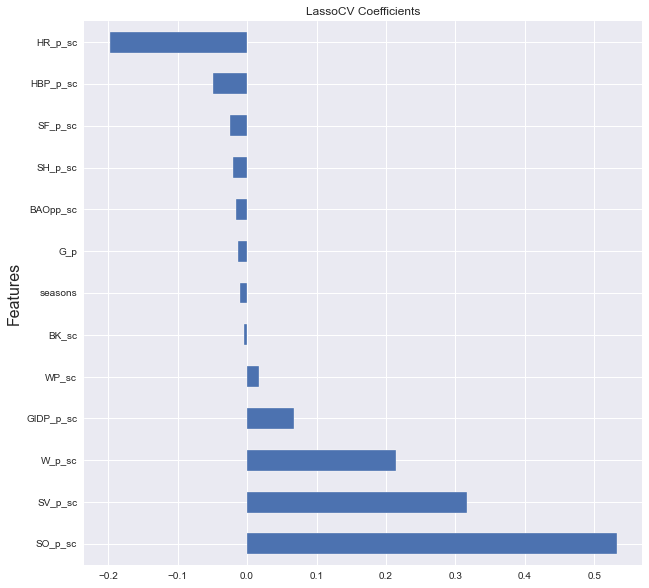

In [42]:
fig, ax = plt.subplots(figsize=(10,10))
model_coef.loc[model_coef['values'] !=0].plot.barh(x='features', y= 'values', ax= ax, legend=False)
ax.set_ylabel('Features', fontsize=16)
ax.set_title('LassoCV Coefficients')

plt.savefig('PNG/lassocv_coef.png', dpi=300, 
            bbox_inches= 'tight', padding_inches = 4, transparent = True )